# Exploratory Data Analysis - Part II

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the raw data 

In [11]:
df = pd.read_csv('../data/flights.csv')

## Drop the outliers (I needed to)

In [20]:
cols = ['arr_delay'] 
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Univariate Analysis
We will plot each individual numeric feature and visualize their distributions.

In [50]:
# Set the figure size
plt.rcParams["figure.figsize"] = (8,4)

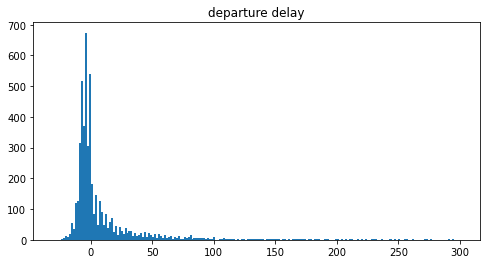

In [51]:
plt.hist(df.dep_delay, bins=np.arange(-30,300, 1.6));
plt.title('departure delay');

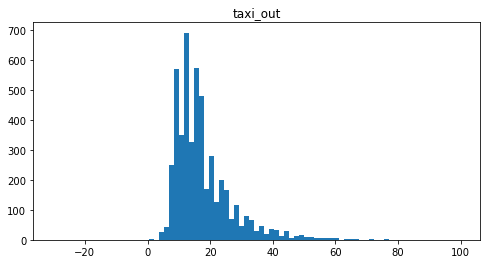

In [52]:
plt.hist(df.taxi_out, bins=np.arange(-30,100, 1.6));
plt.title('taxi_out');

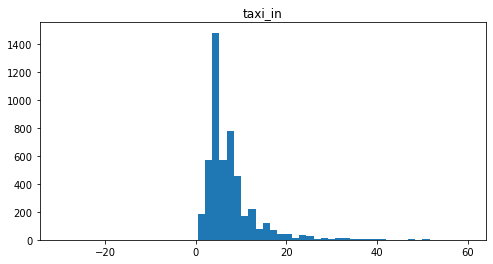

In [53]:
plt.hist(df.taxi_in, bins=np.arange(-30,60, 1.6));
plt.title('taxi_in');

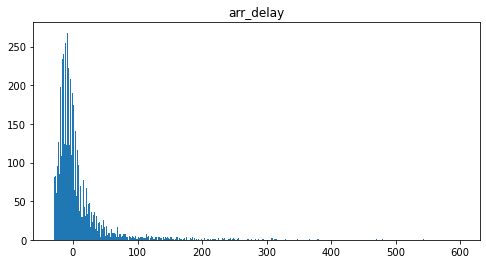

In [54]:
plt.hist(df.arr_delay, bins=np.arange(-30, 600, 1.6));
plt.title('arr_delay');

C:\Users\jacky\anaconda3\envs\bootcamp\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jacky\anaconda3\envs\bootcamp\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


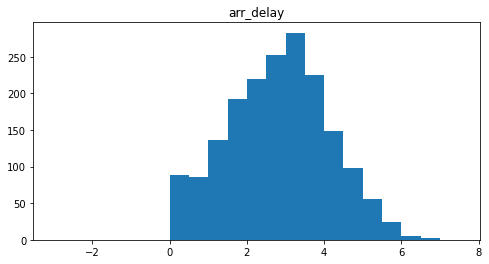

In [55]:
plt.hist(np.log(df.arr_delay), bins=np.arange(-3, 8, 0.5));
plt.title('arr_delay');

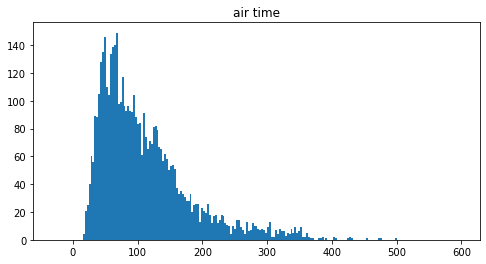

In [56]:
plt.hist(df.air_time, bins=np.arange(-30, 600, 3));
plt.title('air time');

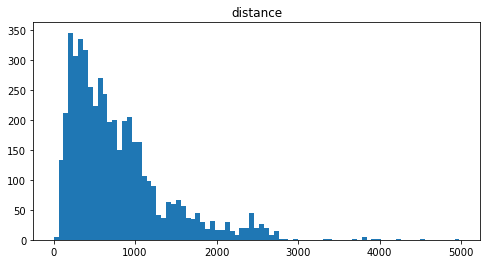

In [57]:
plt.hist(df.distance, bins=np.arange(0, 5000, 60.0));
plt.title('distance');

## Bivariate analysis
We will plot each numeric and categorical feature with respect to `arr_delay`.

### Numeric variables vs `arr_delay`

In [1]:
# load the help function
import modules.help_functions as hf

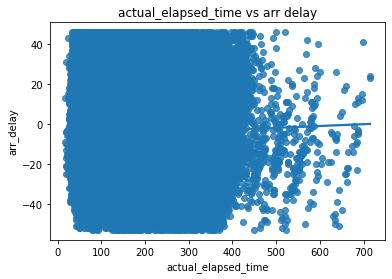

In [25]:
# actual_elapsed_time vs arrival delay
sns.regplot(data=df, x='actual_elapsed_time', y='arr_delay');
plt.title('actual_elapsed_time vs arr delay');

In [36]:
# change the air_time to log scale
x_air = np.log(df.air_time)

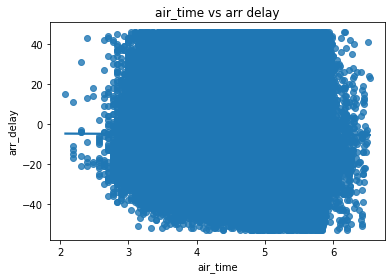

In [37]:
# x_air vs arrival delay
sns.regplot(data=df, x=x_air, y='arr_delay');
plt.title('air_time vs arr delay');

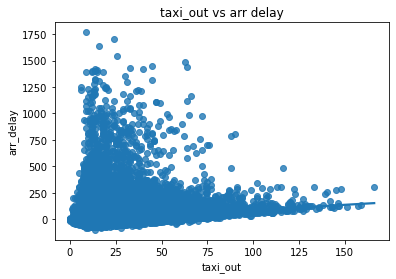

In [62]:
# taxi_out vs arrival delay
sns.regplot(data=df, x='taxi_out', y='arr_delay');
plt.title('taxi_out vs arr delay');

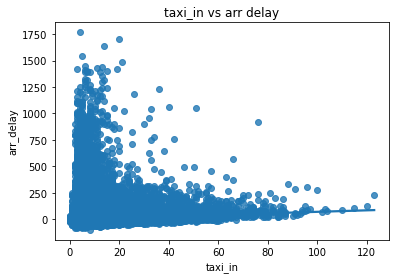

In [63]:
# taxi_in vs arrival delay
sns.regplot(data=df, x='taxi_in', y='arr_delay');
plt.title('taxi_in vs arr delay');

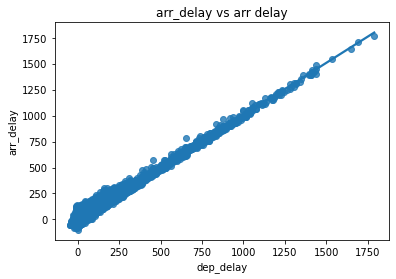

In [61]:
# plot the departure delay vs arrival delay
sns.regplot(data=df, x='dep_delay', y='arr_delay');
plt.title('dep_delay vs arr_delay');

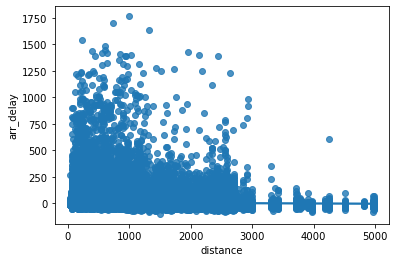

In [11]:
# plot the distance vs arrival delay
sns.regplot(data=df, x='distance', y='arr_delay');

### Categorical variables vs `arr_delay`

In [30]:
# list all categorical variables
cat_cols = ['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier', 
            'op_unique_carrier', 'origin_airport_id', 'origin', 
            'origin_city_name', 'dest_airport_id', 'dest', 
            'dest_city_name', 'cancelled', 'cancellation_code']

In [34]:
# change cal_cols into pandas `category` type
df = hf.make_categorical(df, cat_cols)

In [35]:
# extract all categorical columns
hf.split_numeric_categorical(df, numeric=False).columns

Index(['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'op_unique_carrier', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'cancelled',
       'cancellation_code'],
      dtype='object')

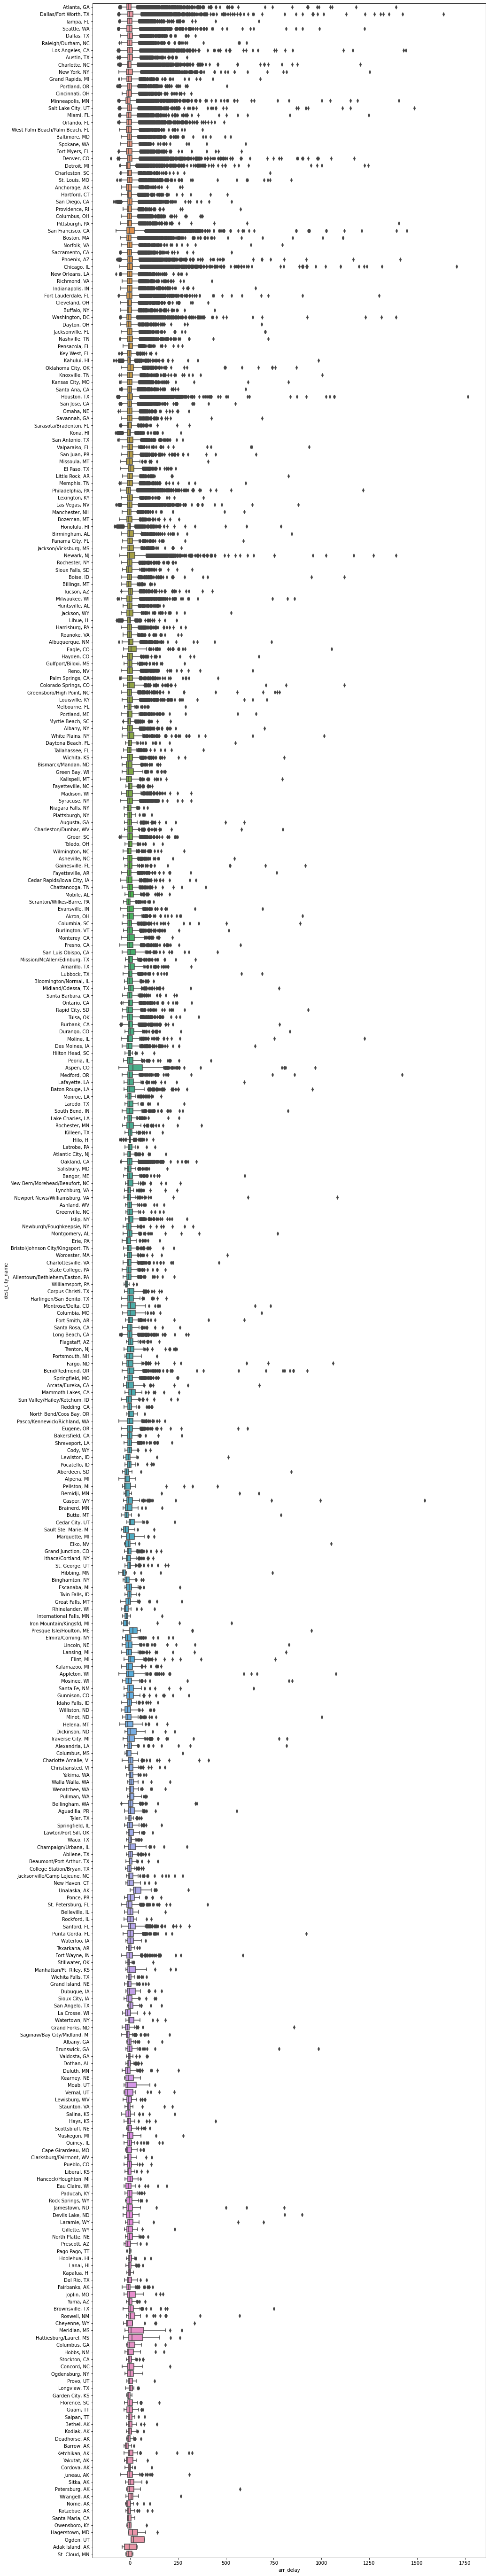

In [5]:
# destination city vs arrival delay
plt.figure(figsize=(15, 100))
sns.boxplot(data=df, x='arr_delay', y='dest_city_name');

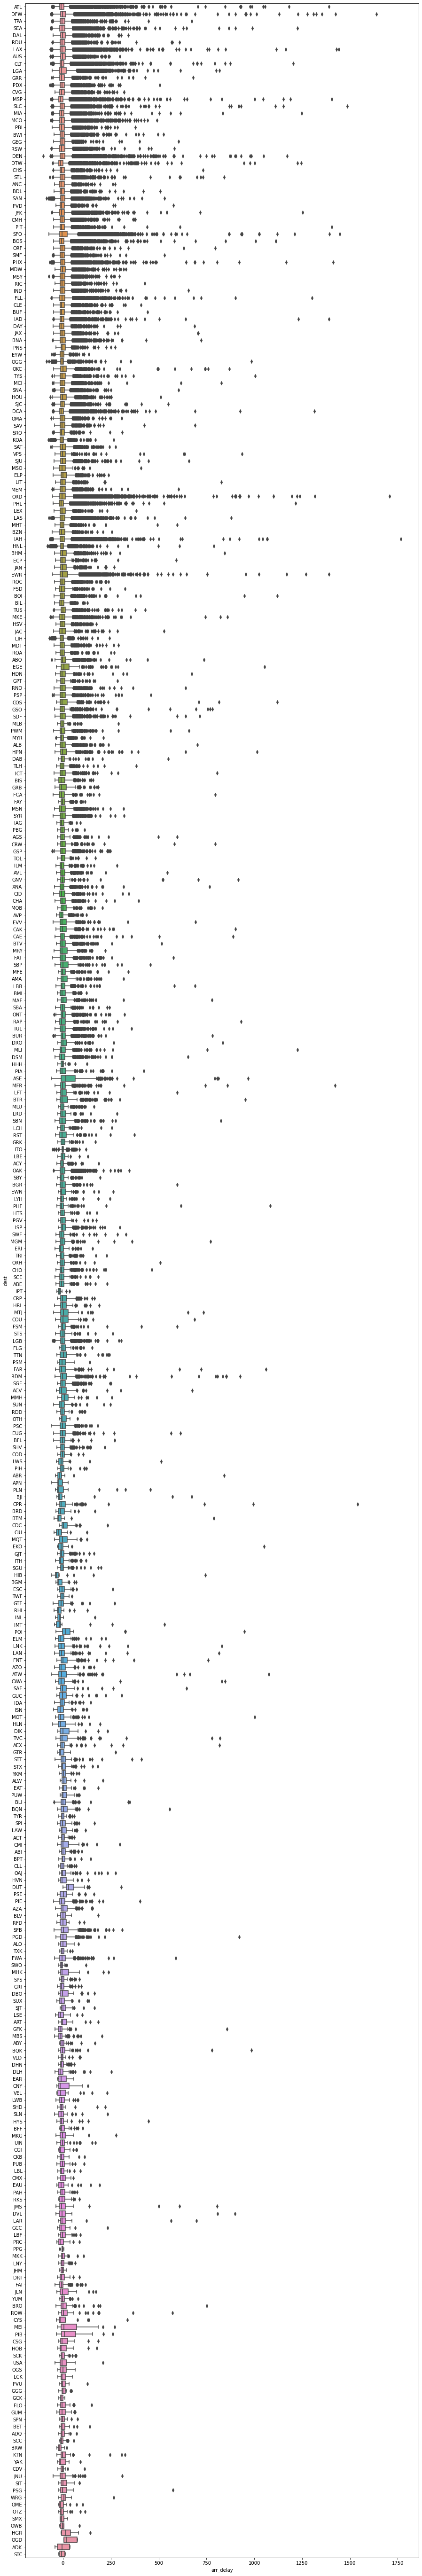

In [3]:
# destination airport code vs arrival delay
plt.figure(figsize=(15, 100))
sns.boxplot(data=df, x='arr_delay', y='dest');

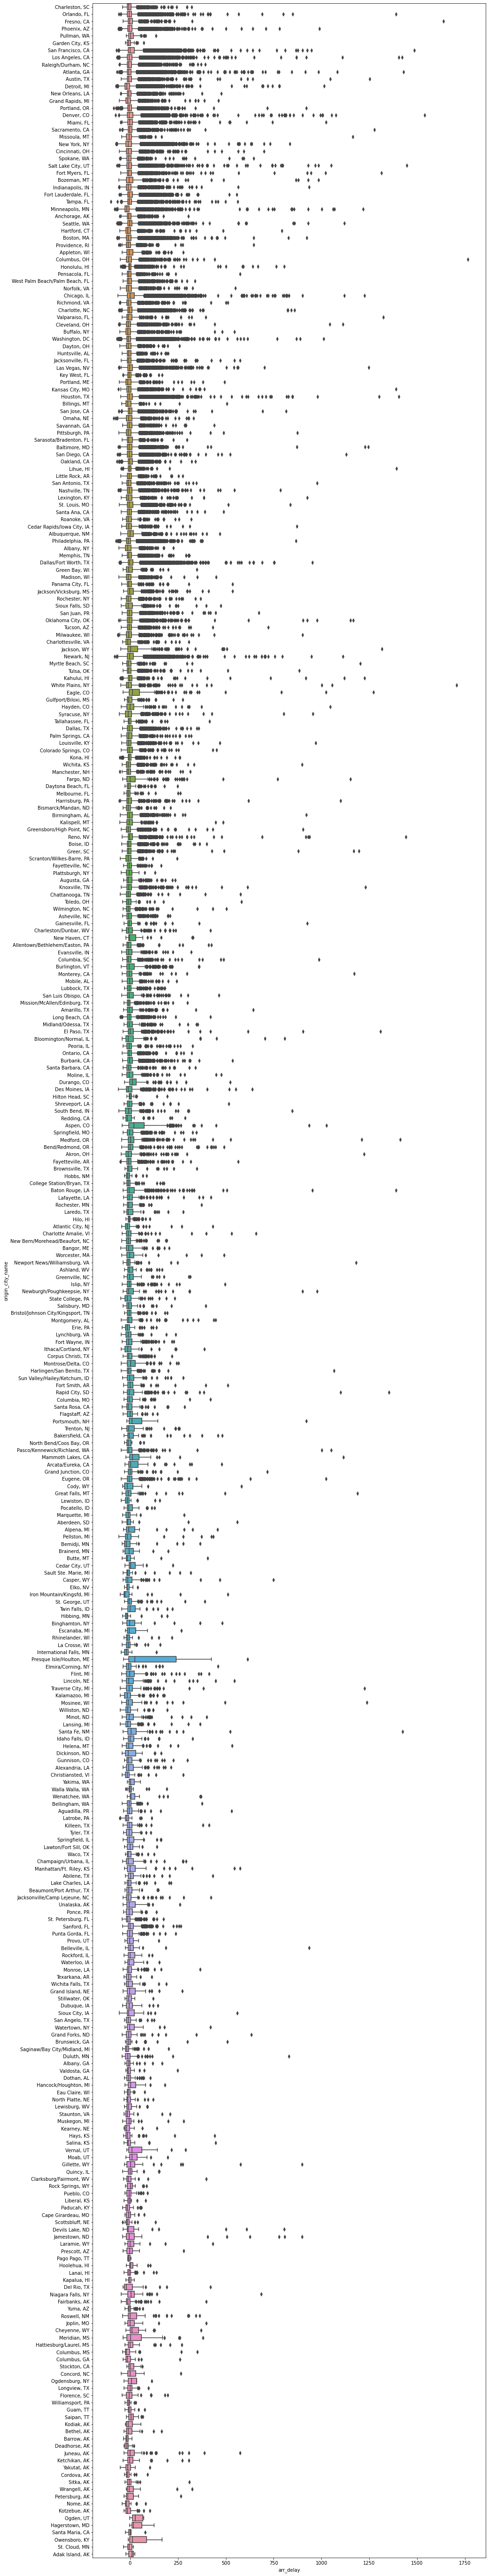

In [65]:
# original city vs arrival delay
plt.figure(figsize=(15, 100))
sns.boxplot(data=df, x='arr_delay', y='origin_city_name');

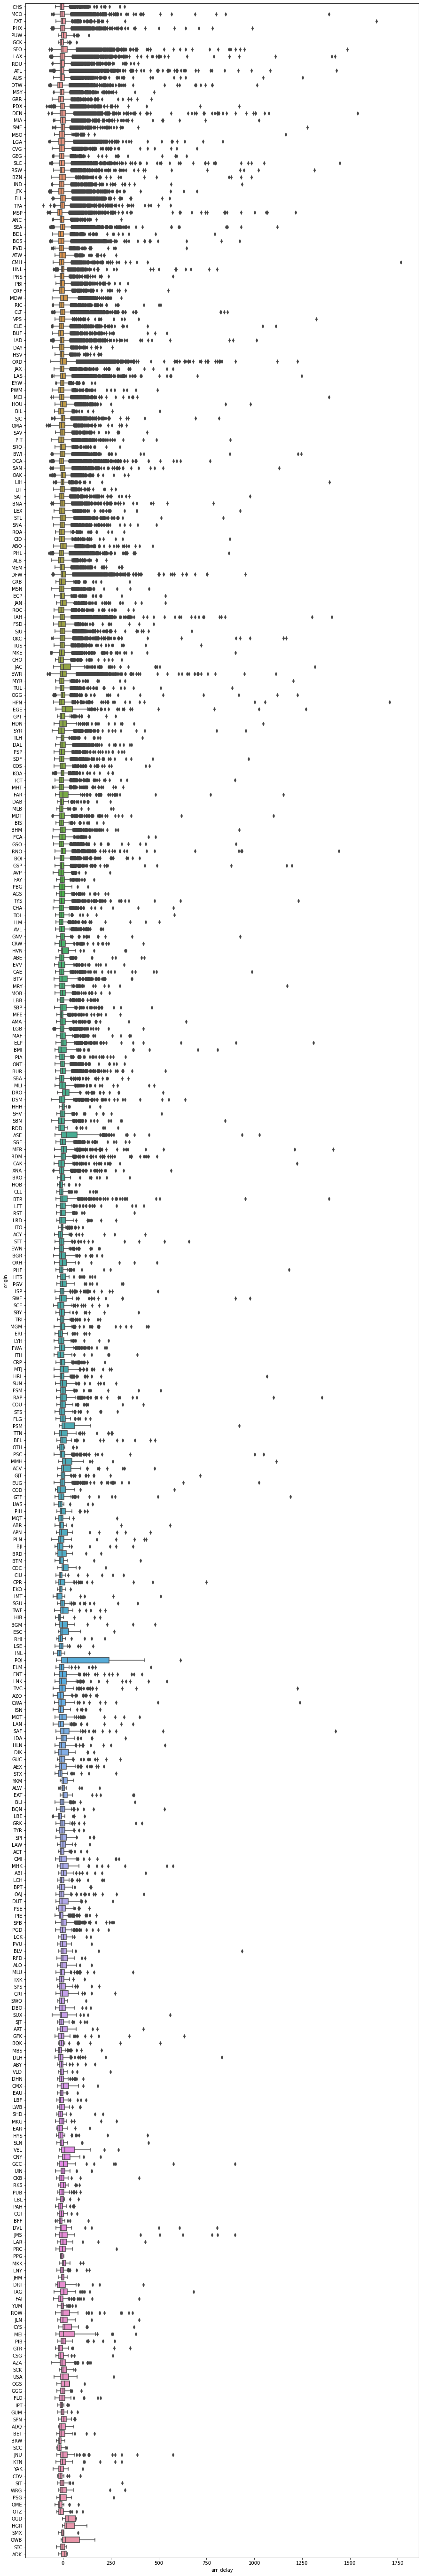

In [64]:
# original airport code vs arrival delay
plt.figure(figsize=(15, 100))
sns.boxplot(data=df, x='arr_delay', y='origin');

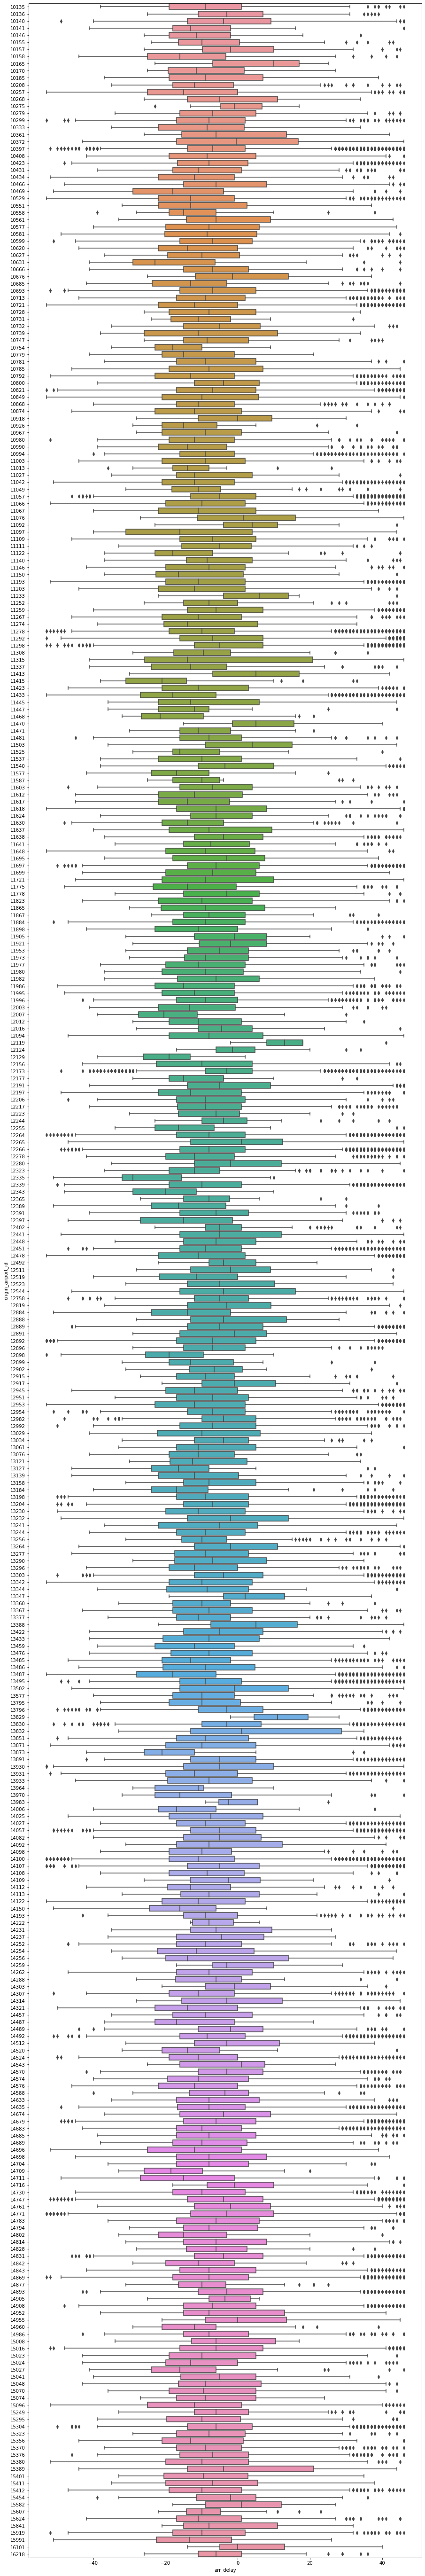

In [59]:
# original airport id vs arrival delay
plt.figure(figsize=(15, 100))
sns.boxplot(data=df, x='arr_delay', y='origin_airport_id');

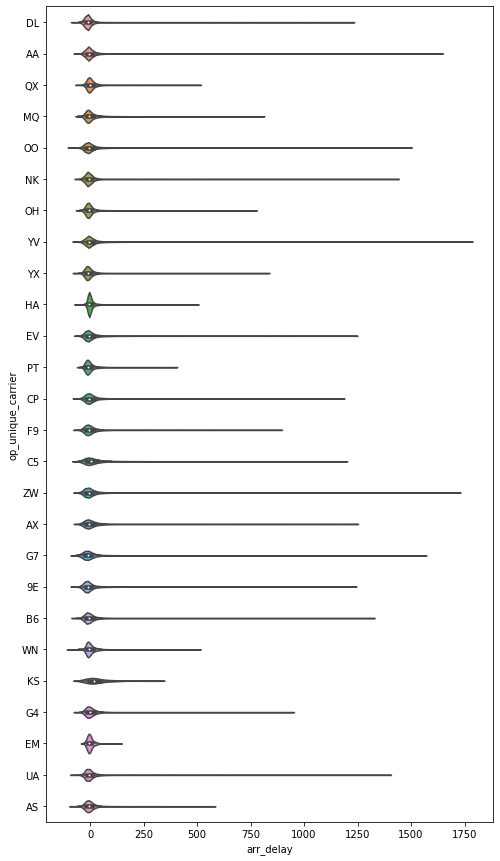

In [12]:
# operational unique carrier vs arrival delay
plt.figure(figsize=(8, 15))
sns.violinplot(data=df, y='op_unique_carrier', x='arr_delay');

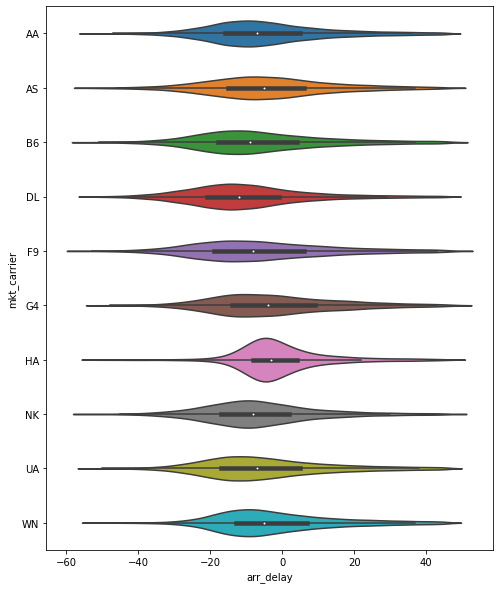

In [44]:
# carrier vs arrival delay
plt.figure(figsize=(8, 10))
sns.violinplot(data=df, y='mkt_carrier', x='arr_delay');

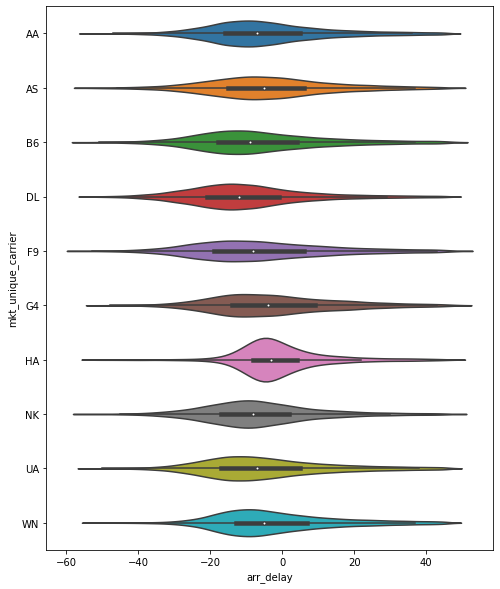

In [43]:
# mkt_unique_carrier vs arrival delay
plt.figure(figsize=(8, 10))
sns.violinplot(data=df, y='mkt_unique_carrier', x='arr_delay');